In [1]:
# https://www.kaggle.com/code/favourphilicvictor/stackoverflow-software-developer-survey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [2]:
data = pd.read_csv('dataset/survey_results_public.csv')
data.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
# replace nan values from all columns to -1
data = data.fillna(-1)

for x in data.columns:
    data[x] = data[x].astype('category')
    data[x] = data[x].cat.codes


In [4]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini')
# model = KNeighborsClassifier(n_neighbors=5)
# model = DecisionTreeClassifier()
X = data.loc[:50000, data.columns != 'Hobbyist']
y = data.loc[:50000, data.columns == 'Hobbyist']

In [5]:
model.fit(X, y)

C:\Users\anish_n48e8\AppData\Local\Temp\ipykernel_34036\2489992722.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


RandomForestClassifier()

In [6]:
X = data.loc[50001:51501, data.columns != 'Hobbyist']
y = data.loc[50001:51501, data.columns == 'Hobbyist']
model.predictions = model.predict(X)
print("precision score:", precision_score(y, model.predictions, average='weighted'))
print("accuracy score:", accuracy_score(y, model.predictions))
print("recall score:", recall_score(y, model.predictions))
print("f1 score:", f1_score(y, model.predictions))


precision score: 0.7571782457791005
accuracy score: 0.7961359093937375
recall score: 0.08917197452229299
f1 score: 0.15469613259668508


C:\Users\anish_n48e8\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


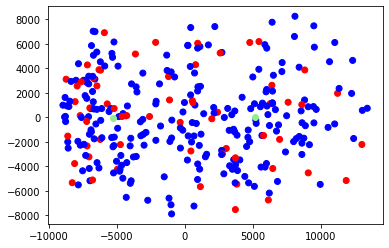

In [7]:
model = KMeans(n_clusters=2)

X_test = data.loc[:300, data.columns != 'Hobbyist']
y_test = data.loc[:300, data.columns == 'Hobbyist'].to_numpy()

X_testPCA = PCA(n_components=2).fit_transform(X_test)

model.fit(X_testPCA)
predictions = model.predict(X_testPCA)

# ["blue" if x[0] == 2 else "red" for x in y_test]

plt.scatter(X_testPCA[:, 0], X_testPCA[:, 1], c=["blue" if x[0] == 2 else "red" for x in y_test])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="lightgreen")